In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

QUESTÃO 1

In [2]:
massa_muscular_idade = pd.read_csv('../Unidade2/DataSets/massa_muscular_x_idade.csv')
massa_muscular_idade.head()

,Massa_muscular_Y,Idade_X
0,82.0,71.0
1,91.0,64.0
2,100.0,43.0
3,68.0,67.0
4,87.0,56.0


(a)

In [3]:
massa_muscular_idade.columns

Index(['Massa_muscular_Y', ' Idade_X'], dtype='object')

In [4]:
x = massa_muscular_idade[' Idade_X'].values
y = massa_muscular_idade['Massa_muscular_Y'].values

In [5]:
beta1, beta0 = np.polyfit(x, y, 1)
print('Coeficiente angular: {:.2f}'.format(beta1))
print('Coeficiente linear: {:.2f}'.format(beta0))

Coeficiente angular: -1.03
Coeficiente linear: 148.20


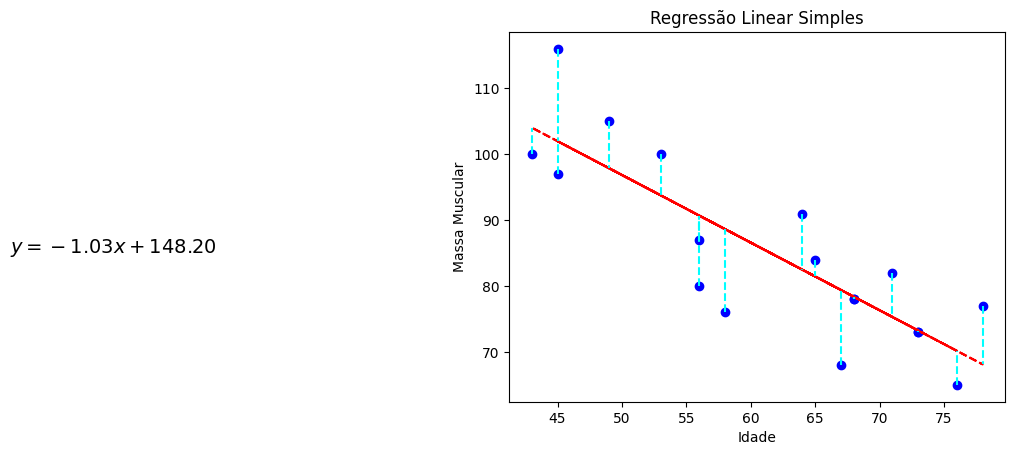

In [6]:
formula = r'$y = {:.2f}x + {:.2f}$'.format(beta1, beta0)

plt.scatter(x, y, color='blue')
plt.plot(x, beta1*x+beta0, '--', color='red')

y_pred = beta1*x + beta0
residuos = y - y_pred

for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], '--', color='cyan')

plt.title('Regressão Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Massa Muscular')
plt.text(2.5, 85, formula, fontsize=14, color='black')
plt.show()

(b)

In [7]:
idade = 50
massa_muscular = beta1 * idade + beta0

print('Massa muscular média estimada para mulheres com 50 anos: {:.2f}'.format(massa_muscular))

Massa muscular média estimada para mulheres com 50 anos: 96.86


QUESTÃO 2

In [8]:
renda_familia_alimentacao = pd.read_csv('../Unidade2/DataSets/renda_familia_alimentacao.csv')
renda_familia_alimentacao.head()

,Renda_Familiar_X,Gasto_Alimentacao_Y
0,3,1.5
1,5,2.0
2,10,6.0
3,10,7.0
4,20,10.0


(a)

In [9]:
renda_familia_alimentacao.columns

Index(['Renda_Familiar_X', ' Gasto_Alimentacao_Y'], dtype='object')

In [10]:
x = renda_familia_alimentacao['Renda_Familiar_X'].values
y = renda_familia_alimentacao[' Gasto_Alimentacao_Y'].values

In [11]:
beta1, beta0 = np.polyfit(x,y,1)
print(f"Gasto com alimentação = {beta1:.2f} * Renda familiar + {beta0:.2f}")

Gasto com alimentação = 0.26 * Renda familiar + 5.40


(b)

A inclinação da reta de regressão do item (a) é 0.26, o que significa que, para cada unidade monetária adicional de renda familiar, espera-se que o gasto com alimentação aumente em média 0.26 unidades monetárias. Isso indica que existe uma relação positiva entre a renda familiar e o gasto com alimentação, ou seja, à medida que a renda aumenta, espera-se que o gasto com alimentação também aumente.

(c)

In [12]:
rendas = [55, 90, 250, 300, 450]

for renda in rendas:
    gasto_estimado = beta1*renda + beta0
    print(f"Gasto estimado para a renda {renda}: {gasto_estimado:.2f}")

Gasto estimado para a renda 55: 19.47
Gasto estimado para a renda 90: 28.42
Gasto estimado para a renda 250: 69.34
Gasto estimado para a renda 300: 82.13
Gasto estimado para a renda 450: 120.50


QUESTÃO 4

In [13]:
erros_horas_sem_dormir = pd.read_csv('../Unidade2/DataSets/no_erros_horas_sem_dormir.csv')
erros_horas_sem_dormir.head()

,No_Errors_Y,No_Horas_Sem_Dormir_X
0,6,8
1,8,8
2,6,12
3,10,12
4,8,16


(a)

In [14]:
x = erros_horas_sem_dormir[' No_Horas_Sem_Dormir_X'].values
y = erros_horas_sem_dormir['No_Errors_Y'].values
x = x.reshape((-1,1))

In [15]:
model = LinearRegression()
model.fit(x,y)
print('numero_erros = {:.2f} * numero_horas_sem_dormir + {:.2f}'.format(model.coef_[0], model.intercept_))

numero_erros = 0.47 * numero_horas_sem_dormir + 3.00


(b)

In [16]:
numero_horas = [2, 6, 18, 25, 30]

for hora in numero_horas:
    numero_estimado = beta1*hora + beta0
    print(f"Número estimado de erros para pessoas que ficaram {hora} horas sem dormir: {numero_estimado:.2f}")

Número estimado de erros para pessoas que ficaram 2 horas sem dormir: 5.91
Número estimado de erros para pessoas que ficaram 6 horas sem dormir: 6.94
Número estimado de erros para pessoas que ficaram 18 horas sem dormir: 10.00
Número estimado de erros para pessoas que ficaram 25 horas sem dormir: 11.79
Número estimado de erros para pessoas que ficaram 30 horas sem dormir: 13.07


QUESTÃO 5

In [17]:
faturamento_publicidade = pd.read_csv('../Unidade2/DataSets/faturamento_por_publicidade.csv', error_bad_lines=False)
faturamento_publicidade.head()

C:\Users\luizg\AppData\Local\Temp\ipykernel_43704\4129913633.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  faturamento_publicidade = pd.read_csv('../Unidade2/DataSets/faturamento_por_publicidade.csv', error_bad_lines=False)
Skipping line 8: expected 3 fields, saw 4



,faturamento_bruto_Y,anuncio_tv,anuncio_jornal
0,96,5.0,1.5
1,90,2.0,2.0
2,95,4.0,1.5
3,92,2.5,2.5
4,95,3.0,3.3


(1)

In [18]:
x = faturamento_publicidade[[' anuncio_jornal', ' anuncio_tv']]
y = faturamento_publicidade['faturamento_bruto_Y']

In [19]:
model = LinearRegression().fit(x, y)
print("Intercepto: {:.2f}".format(model.intercept_))
print("Coeficientes: {:.2f}".format(model.coef_[0]))
print("R²: {:.2f}".format(model.score(x, y)))

Intercepto: 82.06
Coeficientes: 1.72
R²: 0.94


(c) = 83.23 + 2.29 + 1.30 2 = 0.92

O R² é a métrica que representa a proporção da variância na variavel dependente, varia-se entre 0 e 1 e quanto mais próximo de 1, melhor o ajuste do modelo. Então o modelo (c) é o escolhido, apresentando aproximadamente 92%.

(2)

In [20]:
x_new = [[3500, 1800]]
y_predict = model.predict(x_new)
print("Faturamento bruto previsto: {:.2f}".format(y_predict[0]))

Faturamento bruto previsto: 10387.12


c:\Users\luizg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


QUESTÃO 6

In [21]:
custo_distribuicao_vendas = pd.read_csv('../Unidade2/DataSets/custo_distribuicao_vendas_pedidos.csv')
custo_distribuicao_vendas.head()

,mes,y,x1,x2
0,1,52.95,386,4.015
1,2,71.66,446,3.806
2,3,85.56,512,5.309
3,4,63.69,401,4.262
4,5,72.81,457,4.296


In [22]:
x = custo_distribuicao_vendas[['x1', 'x2']]
y = custo_distribuicao_vendas['y']

In [23]:
model = LinearRegression().fit(x,y)
print('Coeficientes: {:.2f}'.format(model.coef_[0]))
print('Intercepto: {:.2f}'.format(model.intercept_))

Coeficientes: 0.04
Intercepto: -9.81


QUESTÃO 7

In [26]:
behavior = pd.read_csv('../Unidade2/DataSets/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv', sep=';')
behavior.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"4,1"
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"6,6"
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"8,7"
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"9,2"
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"11,1"


In [27]:
x = behavior['Hour (Coded)']
y = behavior['Slowness in traffic (%)']

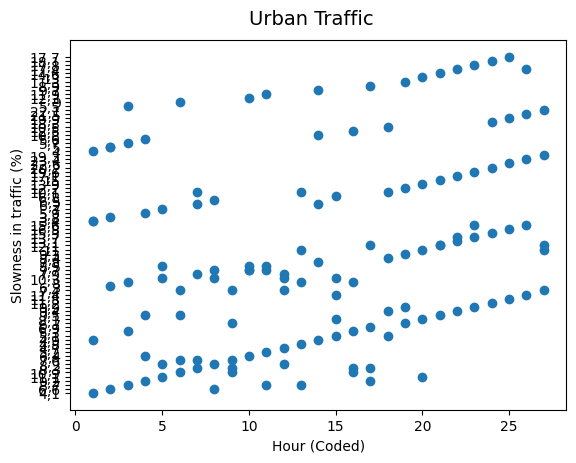

In [28]:
title = 'Urban Traffic'
plt.scatter(x, y)
plt.xlabel('Hour (Coded)')
plt.ylabel('Slowness in traffic (%)')
plt.text(10, 90, title, fontsize=14, color='black')
plt.show()

QUESTÃO 8

In [31]:
cicle_power_plants = pd.read_excel('../Unidade2/DataSets/Folds5x2_pp.xlsx')
cicle_power_plants.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [32]:
x = cicle_power_plants[['AT', 'V', 'AP', 'RH']]
y = cicle_power_plants['PE']

model = LinearRegression().fit(x, y)
y_pred = model.predict(x)